# EDA

In [1]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
sns.set_theme()

## Analisis
1. Reducción de CO2 y mejora de la calidad del aire

In [2]:
# Acceso a el cvs y se pasa a un dataframe 
df_convencional = pd.read_parquet('../Data/df_vfed.parquet')

In [3]:
# Revisamos los datos a nivel general
df_convencional.head(2)

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel
0,2017,BMW,M6 Coupe,15.0,519.0,3850.0,0.0,Premium Gasoline,Subcompact Cars,No
1,2017,BMW,X3 sDrive28i,21.0,374.0,2700.0,0.0,Premium Gasoline,Small Sport Utility Vehicle 2WD,No


In [4]:
# Conteo de vehículos por año 
Cantidad_vehiculos = df_convencional['Year'].value_counts().sort_index()

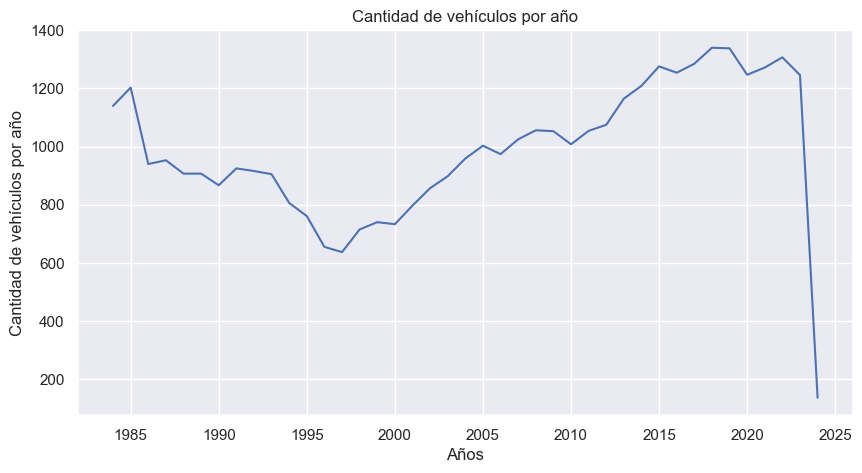

In [5]:
# Grafico donde muestra la cantidad de vehículos convencionales por año
plt.figure(figsize=(10,5))
sns.lineplot(x=Cantidad_vehiculos.index, y=Cantidad_vehiculos.values)
plt.xlabel('Años')
plt.ylabel('Cantidad de vehículos por año')
plt.title('Cantidad de vehículos por año')
plt.show()

En al anterior grafico podemos ver la cantidad de vehiculos convencionales para los diferentes años, como conclución podemos ver que en 1995 se puede ver una reducción en la adquisición de este tipo de vehículos.

In [6]:
df_convencional_filtrado = df_convencional[df_convencional['CO2 (p/mile)'] > 0]

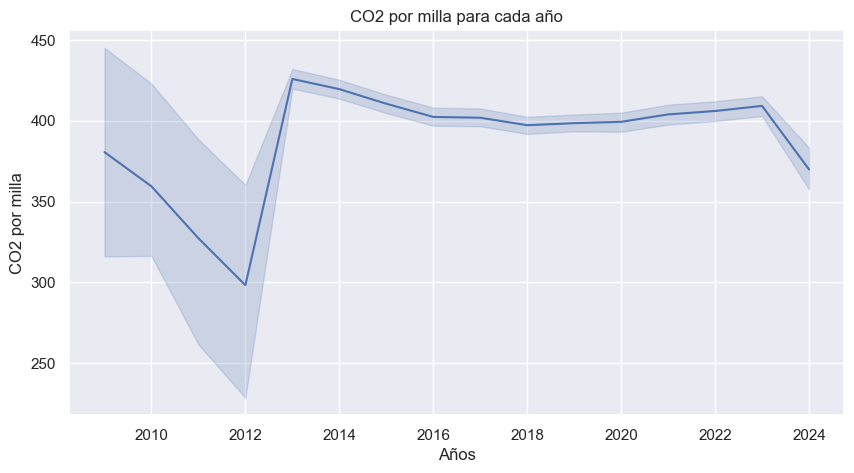

In [7]:
# Grafico del CO2 por milla
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='CO2 (p/mile)', data=df_convencional_filtrado)
plt.xlabel('Años')
plt.ylabel('CO2 por milla')
plt.title('CO2 por milla para cada año')
plt.show()

En el grafico anterior podemos ver la poducción de CO2 por milla de los vehículos convencionales, donde como conclución podemos ver una reducción en el año 2012, mientras que actualmente se mantiene el nivel de contaminación.

In [8]:
# Filtramos un dataset con los datos del año 2023
Año_2023 = df_convencional[df_convencional['Year'] == 2023]

In [9]:
# Obtenemos el promedio de producción de CO2 por milla
Promedio_contaminacion = Año_2023['CO2 (p/mile)'].sum() / Año_2023.shape[0]
Contaminación_T = Año_2023['CO2 (p/mile)'].sum()
print('Para el año 2023 el promedio de contaminación es ', Promedio_contaminacion)
print('Con un total de producción de CO2 de ', Contaminación_T)

Para el año 2023 el promedio de contaminación es  369.2223113964687
Con un total de producción de CO2 de  460051.0


# KPI
Se propone bajar en indice de CO2 por milla que actualmente producen los vehículos convencionales en un 5% anual por 5 años en la ciudad de New York, por medio de implementación de vehículos electricos que no producen contaminación, al dejar de comprar vehiculos convencionales y remplazarlos con vehiculos electricos, bajara el nivel de CO2 producido por milla. 
# Conclusión 
Con esta accción podemos vajar los niveles de contaminación que son producto en gran parte por lo vehículos, en este caso como su uso es publico donde la cantidad de millas que estos vehículos deben recorrer es bastante, lo cual hace que produscan mucho mas CO2 que un vehículo particular.

# Métricas y cálculo del KPI
Emisiones de CO2 reducidas por flota híbrida o eléctrica / Emisiones totales de CO2 antes de la implementación) * 100 = % de Reducción de CO2

(Sum(CO2 (p/mile)Añoactual) / Sum(CO2 (p/mile)Añoanterior)) *100

In [64]:
df_convencional_N = df_convencional[df_convencional['CO2 (p/mile)'] >= 0]
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000
mean,2018.062412,23.513783,391.612666,2671.031241,155.375318
std,3.264239,16.878273,127.391996,856.007575,681.121269
min,1998.000000,8.000000,0.000000,500.000000,0.000000
25%,2015.000000,17.000000,328.000000,2100.000000,0.000000
50%,2018.000000,20.000000,394.000000,2600.000000,0.000000
75%,2021.000000,24.000000,467.000000,3100.000000,0.000000
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000


In [65]:
# Realizamos una función para categorizar los vehículos
def categorizar_vehiculos(row):
    if row['Alternative Fuel'] == 'Electricity':
        return 'Híbrido'
    elif row['Fuel'] == 'Electricity':
        return 'Eléctrico'
    elif row['Alternative Fuel'] in ['E85', 'No'] and row['Fuel'] != 'Natural Gas' and row['CO2 (p/mile)'] > 0:
        return 'Comvencional'
    else:
        return 'Gas'
    
# Aplicamos la función 
df_convencional_N['Categoria'] = df_convencional_N.apply(categorizar_vehiculos, axis=1)
df_convencional_N.head(3)

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel,Categoria
0,2017,BMW,M6 Coupe,15.0,519.0,3850.0,0.0,Premium Gasoline,Subcompact Cars,No,Comvencional
1,2017,BMW,X3 sDrive28i,21.0,374.0,2700.0,0.0,Premium Gasoline,Small Sport Utility Vehicle 2WD,No,Comvencional
2,2016,Infiniti,Q50S Red Sport,20.0,402.0,2950.0,0.0,Premium Gasoline,Midsize Cars,No,Comvencional


In [31]:
# Vehiculois hibridos 
df_convencional_1 = df_convencional[df_convencional['Alternative Fuel'] == 'Electricity']
df_convencional_2 = df_convencional_1[df_convencional_1['FuelCostA'] > 0]
df_convencional_2.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2017.745763,26.559322,166.779661,2526.271186,1072.881356
std,2.481610,8.278079,112.647156,674.495720,348.682500
min,2011.000000,16.000000,22.000000,1250.000000,600.000000
25%,2016.000000,20.000000,51.000000,1925.000000,650.000000
50%,2018.000000,21.000000,156.000000,2850.000000,1200.000000
75%,2020.000000,33.000000,269.000000,3100.000000,1400.000000
max,2021.000000,43.000000,362.000000,3650.000000,1600.000000


In [39]:
# Hibrido
df_convencional_1 = df_convencional[df_convencional['Alternative Fuel'] == 'Electricity']
df_convencional_2 = df_convencional_1[df_convencional_1['FuelCostA'] == 0]
df_convencional_2.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,237.000000,237.000000,237.000000,237.000000,237.0
mean,2019.649789,29.046414,179.181435,2260.970464,0.0
std,2.504177,10.116376,74.650292,754.046926,0.0
min,2012.000000,16.000000,57.000000,1000.000000,0.0
25%,2018.000000,22.000000,119.000000,1600.000000,0.0
50%,2020.000000,26.000000,177.000000,2350.000000,0.0
75%,2022.000000,35.000000,229.000000,2650.000000,0.0
max,2023.000000,55.000000,463.000000,3850.000000,0.0


In [37]:
# Combencional
df_convencional_1 = df_convencional[df_convencional['Alternative Fuel'] == 'E85']
df_convencional_1.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,2011.824846,16.175154,220.847994,3026.851852,3163.001543
std,4.985635,3.085305,239.086739,565.648263,576.447933
min,2000.000000,11.000000,-1.000000,1650.000000,1800.000000
25%,2009.000000,14.000000,-1.000000,2650.000000,2750.000000
50%,2012.000000,16.000000,-1.000000,2950.000000,3200.000000
75%,2015.000000,18.000000,458.000000,3550.000000,3450.000000
max,2023.000000,28.000000,646.000000,5050.000000,4600.000000


In [60]:
# Vehiculos electricos
df_convencional_1 = df_convencional[df_convencional['Alternative Fuel'] == 'No']
df_convencional_2 = df_convencional_1[df_convencional_1['CO2 (p/mile)'] == 0]
df_convencional_2.head(2)

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel
20,2016,Tesla,Model S (75 kW-hr battery pack),97.0,0.0,700.0,0.0,Electricity,Large Cars,No
184,2017,Kia,Soul Electric,120.0,0.0,650.0,0.0,Electricity,Small Station Wagons,No


In [56]:
# Combencionales 
df_convencional_1 = df_convencional[df_convencional['Alternative Fuel'] == 'No']
df_convencional_2 = df_convencional_1[df_convencional_1['CO2 (p/mile)'] > 0]
df_convencional_3 = df_convencional_2[df_convencional_2['Fuel'] != 'Natural Gas']  
df_convencional_3.head()  

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel
0,2017,BMW,M6 Coupe,15.0,519.0,3850.0,0.0,Premium Gasoline,Subcompact Cars,No
1,2017,BMW,X3 sDrive28i,21.0,374.0,2700.0,0.0,Premium Gasoline,Small Sport Utility Vehicle 2WD,No
2,2016,Infiniti,Q50S Red Sport,20.0,402.0,2950.0,0.0,Premium Gasoline,Midsize Cars,No
3,2017,MINI,John Cooper Works Convertible,24.0,327.0,2400.0,0.0,Premium Gasoline,Minicompact Cars,No
4,2017,Kia,Sedona SX,18.0,433.0,2550.0,0.0,Regular Gasoline,Minivan - 2WD,No


In [59]:
# Vehiculos a gas 
df_convencional_1 = df_convencional[df_convencional['Fuel'] == 'Natural Gas']
df_convencional_1.describe()

array(['No'], dtype=object)